## Importing Important Libraries

In [32]:
import re
import numpy as np
import pandas as pd
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder

# For Preprocesssing Text Data
from nltk.tokenize import word_tokenize

# Check Performance
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
f = pd.read_csv('ecommerceDataset.csv')

In [3]:
# Rename Col Names`
f.columns = ['Category', 'Sequence']

## Data Pre-processing

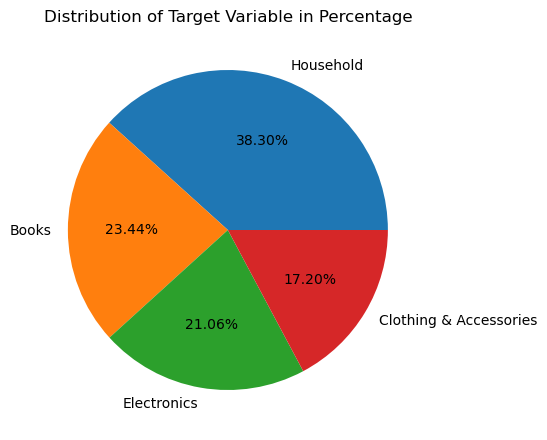

In [4]:
pie = f['Category'].value_counts().rename_axis('Subclass').reset_index(name = 'counts')
labels = pie.Subclass
values = pie.counts
fig = plt.figure(figsize = (4,4))
ax = fig.add_axes([0,0,1,1])
ax.pie(values, labels = labels, autopct = '%1.2f%%')
plt.title("Distribution of Target Variable in Percentage")
plt.show()

In [5]:
print(f.duplicated().sum())
f = f.drop_duplicates()
print(f.isnull().sum())
f = f.dropna()

22622
Category    0
Sequence    1
dtype: int64


In [6]:
f.head()

,Category,Sequence
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [7]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [8]:
'''Removing punctutions and creating stop words and lematizing the dataset'''
def clean_text_data(raw_data):
    # Remove Puctuations
    raw_data['Sequence'] = raw_data['Sequence'].apply(remove_punctuations)
    

    # Get Stopwords
    stop = stopwords.words('english')

    # Remove Stop Words
    raw_data['Sequence'] = raw_data['Sequence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

    # Instance of Lemmatizer
    wordnet = WordNetLemmatizer()

    # Lemmatize
    raw_data['Sequence'] = raw_data['Sequence'].apply(lambda x: wordnet.lemmatize(x))
    
    #outout will be cleaned data
    return raw_data # cleaned
f = clean_text_data(f)

In [9]:
y = f['Category']
X = f[['Sequence']] # Dont use Ids

'''Label Encoding the Target Variable '''

lb_make = LabelEncoder()
y = lb_make.fit_transform(y)
    

In [10]:
'''Splitting Dataset in train and test with 80, 20 ratio'''

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Text Vectorization

In [11]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Define the TextVectorization layer
vectorizer = TextVectorization(max_tokens=2000, output_mode='count')

# Adapt the TextVectorization layer to the training data
vectorizer.adapt(X_train)

# Use the TextVectorization layer to transform the input data
X_train = vectorizer(X_train)
X_test = vectorizer(X_test)
X_val = vectorizer(X_val)


## Logistic Regression Model

In [16]:

# Create a logistic regression model and fit it on the training data
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)



''' Make predictions on the Validation data
'''
y_pred1 = lr_model.predict(X_val)



''' Make predictions on the testing data
'''
y_pred = lr_model.predict(X_test)




## Validation Accuracy

In [17]:
print(classification_report(y_val,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1011
           1       0.97      0.94      0.95       909
           2       0.91      0.86      0.89       872
           3       0.92      0.91      0.92      1656

    accuracy                           0.92      4448
   macro avg       0.92      0.92      0.92      4448
weighted avg       0.92      0.92      0.92      4448



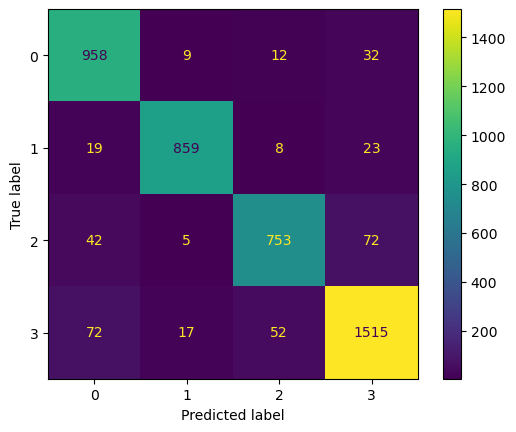

In [39]:
confusion_matrix = metrics.confusion_matrix(y_val,y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

## Test Accuracy

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1291
           1       0.96      0.95      0.96      1131
           2       0.92      0.85      0.89      1027
           3       0.93      0.92      0.92      2112

    accuracy                           0.92      5561
   macro avg       0.92      0.92      0.92      5561
weighted avg       0.92      0.92      0.92      5561



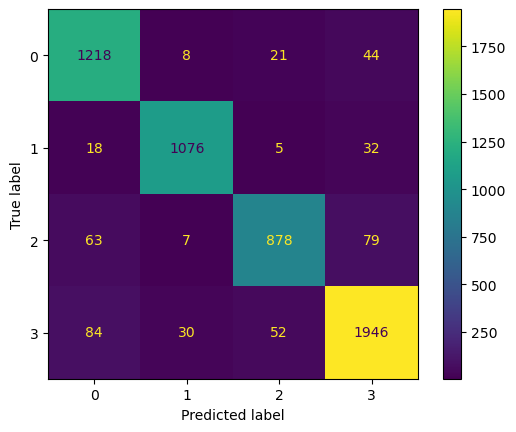

In [35]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

## Decision Tree Classifier

In [19]:
#we will use decision tree model for better accuracy 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Validation Accuracy

In [24]:
y_pr1 = model.predict(X_val)
print(classification_report(y_val,y_pr1))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1011
           1       0.93      0.92      0.92       909
           2       0.82      0.82      0.82       872
           3       0.86      0.84      0.85      1656

    accuracy                           0.86      4448
   macro avg       0.86      0.87      0.87      4448
weighted avg       0.86      0.86      0.86      4448



## Test Accuracy

In [21]:
y_pr = model.predict(X_test)

In [22]:
print(classification_report(y_test,y_pr))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1291
           1       0.92      0.91      0.92      1131
           2       0.84      0.82      0.83      1027
           3       0.87      0.86      0.87      2112

    accuracy                           0.87      5561
   macro avg       0.87      0.87      0.87      5561
weighted avg       0.87      0.87      0.87      5561



## The End